In [29]:
import geopandas as gpd
import pandas as pd
import seaborn as sbn
from scipy.stats import mstats
import geoplot

# Reading a GeoPackage file
data = gpd.read_file("mappinginequality.gpkg")

dataBaltimore = data[((data['city']=='Baltimore'))].copy()

print(dataBaltimore['city'].unique())
# Perform operations on the data, e.g., filtering, reprojecting, etc.
# ...

print(dataBaltimore.head())

['Baltimore']
      area_id       city state  city_survey category grade label  residential  \
4100     2877  Baltimore    MD         True     Best     A    A1         True   
4101     2875  Baltimore    MD         True     Best     A    A2         True   
4102     2884  Baltimore    MD         True     Best     A    A3         True   
4103     2897  Baltimore    MD         True     Best     A    A4         True   
4104     2903  Baltimore    MD         True     Best     A    A5         True   

      commercial  industrial     fill  \
4100       False       False  #76a865   
4101       False       False  #76a865   
4102       False       False  #76a865   
4103       False       False  #76a865   
4104       False       False  #76a865   

                                               geometry  
4100  MULTIPOLYGON (((-76.61036 39.34638, -76.61132 ...  
4101  MULTIPOLYGON (((-76.58876 39.33125, -76.59808 ...  
4102  MULTIPOLYGON (((-76.59573 39.379, -76.59575 39...  
4103  MULTIPOLYGON (

<Axes: >

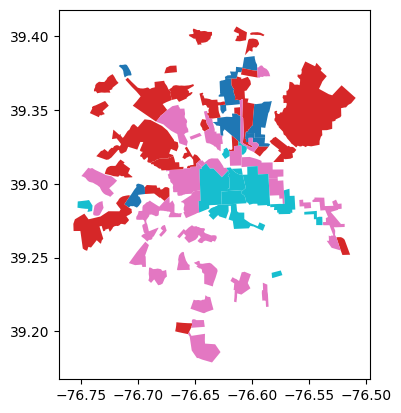

In [30]:
dataBaltimore.plot(column='grade')

In [113]:


baltimore_RE = pd.read_csv("redfin_2024-10-19-11-30-56.csv")
Q1 = baltimore_RE['PRICE'].quantile(0.05)
Q3 = baltimore_RE['PRICE'].quantile(0.95)
IQR = Q3 - Q1

baltimore_RE_cropped = baltimore_RE[~((baltimore_RE['PRICE'] < (Q1 - 1.5 * IQR)) |(baltimore_RE['PRICE'] > (Q3 + 1.5 * IQR)))]

print(baltimore_RE.columns.values.tolist())

unique_property_types = baltimore_RE_cropped['PROPERTY TYPE'].unique()



townhouse_condo = baltimore_RE_cropped[((baltimore_RE_cropped['PROPERTY TYPE']=='Townhouse')|(baltimore_RE_cropped['PROPERTY TYPE']=='Condo/Co-op'))].copy()

townhouse_condo.loc[:,'AGE OF LISTING'] = townhouse_condo['DAYS ON MARKET'].apply(lambda x: 'Less than a month' if x < 30 else 'More than a month')





['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE']


In [38]:
gdf = gpd.GeoDataFrame(
    townhouse_condo, geometry=gpd.points_from_xy(townhouse_condo['LONGITUDE'], townhouse_condo['LATITUDE']), crs="EPSG:4326"
)

<Axes: >

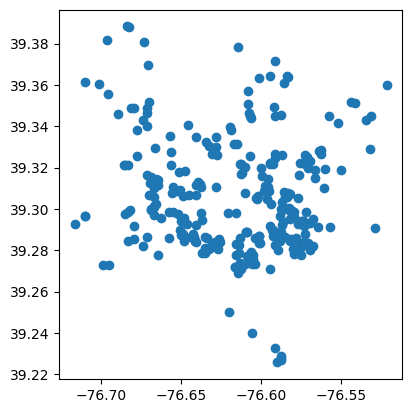

In [47]:
gdf.plot()

<Axes: >

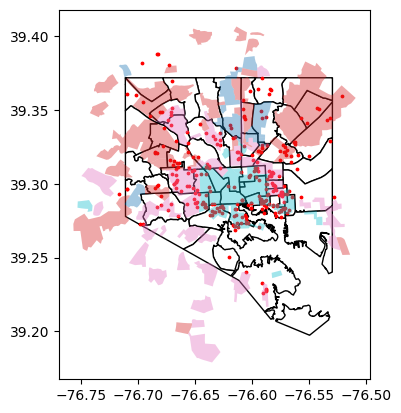

In [112]:

# BaltimoreShape.plot(ax=ax, alpha=0.4, color='grey')
dataBaltimore.to_crs(BaltimoreShape.crs)
gdf.to_crs(BaltimoreShape.crs)

base = BaltimoreShape.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=3);
dataBaltimore.plot(ax=base, column='grade', alpha=0.4)


In [84]:
import geoplot as gplt